# Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
# Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
# Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import sqlite3
import matplotlib.pyplot as plt
db=sqlite3.connect("IMDB.sqlite")
cur=db.cursor()

In [67]:
data=pd.read_sql_query("select Title,Rating,genre,Budget from IMDB join genre on IMDB.Movie_id=genre.Movie_id",db)
data.head()
df=data.copy()
def f(bud):
    if bud=="":
        return 0
    return float(bud)
df["Budget"]=df["Budget"].apply(f)
df["genre"].value_counts()

Drama        77
Adventure    43
             41
Action       33
Comedy       31
Biography    21
Sci-Fi       18
Thriller     14
Romance      13
Animation    13
Crime        11
Fantasy       7
Mystery       7
History       6
Sport         3
Family        3
Music         3
Western       2
War           2
Horror        2
Musical       1
Name: genre, dtype: int64

In [68]:
Genre=list(df["genre"].unique())
Genre1=[]
for i in range(len(Genre)):
    if Genre[i]!="":
        Genre1.append(Genre[i])
Genre1
    

['Biography',
 'Drama',
 'History',
 'Adventure',
 'Comedy',
 'Romance',
 'Fantasy',
 'Action',
 'Mystery',
 'Sci-Fi',
 'Animation',
 'Thriller',
 'Sport',
 'Western',
 'Crime',
 'War',
 'Family',
 'Music',
 'Musical',
 'Horror']

In [69]:
values=[]
for i in range(len(Genre)):
    if Genre[i]!="":
        final_df=df[df["genre"]==Genre[i]]
        values.append(final_df["Budget"].sum())
values

[624500000.0,
 2614400000.0,
 173000000.0,
 6046700000.0,
 1740100000.0,
 270900000.0,
 1094000000.0,
 4332500000.0,
 469000000.0,
 2596000000.0,
 1845200000.0,
 961500000.0,
 110000000.0,
 138000000.0,
 426500000.0,
 87000000.0,
 460000000.0,
 37300000.0,
 61000000.0,
 6600000.0]

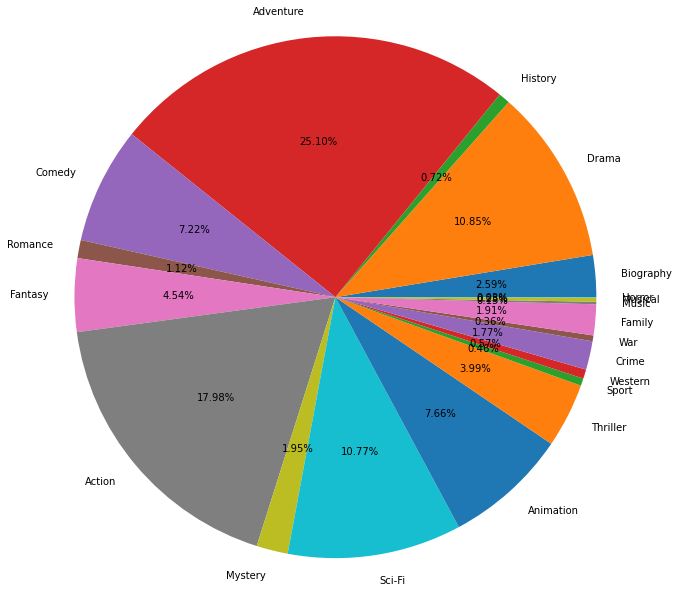

In [75]:
# Ploting Pie Chart
plt.pie(values,labels=Genre1,radius=3,autopct="%.2f%%")
plt.show()
percentages=[2.59,10.85,0.72,25.10,7.22,1.12,4.54,17.98,1.95,10.77,7.66,3.99,0.46,0.57,1.77,0.36,1.91,0.15,0.25,0.03]